## Mnist dataset classification using tensorflow

### Importing required libraries

In [44]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Loading the dataset

In [45]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [46]:
X_train.shape

(60000, 28, 28)

In [47]:
X_train[0].shape

(28, 28)

In [48]:
X_test.shape

(10000, 28, 28)

In [49]:
y_train.shape

(60000,)

In [50]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [51]:
X_train=X_train/255
X_test=X_test/255

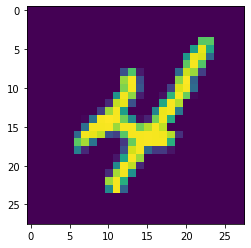

In [52]:
plt.imshow(X_train[9])

In [ ]:
import Pillow

In [54]:
y_train[9]

4

In [55]:
X_train.shape

(60000, 28, 28)

### Not applying CNN but using simple ANN architecture that is why reshaping to get a single (60000,784) array

In [56]:
X_train = X_train.reshape((len(X_train),(X_train.shape[1]*X_train.shape[2])))

In [57]:
X_train.shape

(60000, 784)

In [58]:
X_test = X_test.reshape((len(X_test),(X_test.shape[1]*X_test.shape[2])))

In [59]:
X_test.shape

(10000, 784)

In [60]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Creating Model

In [61]:
model = keras.Sequential([
    layers.Dense(10,input_shape=(784,),activation='relu'), # 10 units
    layers.Dense(120,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(10,activation='softmax')    
])
# tensorboard = https://www.youtube.com/watch?v=9SdLOcGnebU&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=16
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # our output value y is a single value that is why
# we are using sparse if it were a one hot encoded value then we would have used simple categorical_crossentropy

#### If you dont want to reshape before the model simply add the  flatten layer in the model like this ->
layers.Flatten(input_shape=(28,28))

### Training the model

In [62]:
model.fit(X_train,y_train,epochs=10,callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.3609 - accuracy: 0.8892
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2001 - accuracy: 0.9401
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1674 - accuracy: 0.9487
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1481 - accuracy: 0.9533
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1351 - accuracy: 0.9578
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1263 - accuracy: 0.9602
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1168 - accuracy: 0.9631
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1088 - accuracy: 0.9651
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1029 - accuracy: 0.9668
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.098

### Evaluating the model

In [64]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 983us/step - loss: 0.1434 - accuracy: 0.9582


[0.14335887134075165, 0.9581999778747559]

### Making predictions on test set

In [65]:
mypred=model.predict(X_test)

313/313 [==============================] - 0s 834us/step


In [66]:
mypred[0]

array([3.1402571e-08, 1.0904705e-08, 2.3812120e-04, 2.0778076e-04,
       1.6844731e-07, 3.1767979e-06, 2.3238916e-15, 9.9943238e-01,
       1.1496458e-05, 1.0678606e-04], dtype=float32)

In [67]:
predictions = [np.argmax(i) for i in mypred]

In [68]:
predictions[1]

2

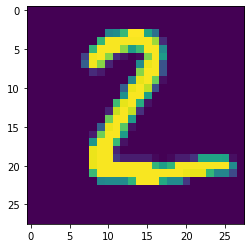

In [16]:
plt.imshow(X_test[1])

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predictions)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    1,    0,    1,    4,    7,    7,    3,    1],
       [   0, 1121,    2,    4,    0,    1,    2,    0,    5,    0],
       [   5,    6,  970,    7,    6,    1,    3,   17,   16,    1],
       [   2,    0,    5,  965,    0,    9,    1,   12,   13,    3],
       [   3,    1,    6,    0,  942,    3,   16,    4,    2,    5],
       [   5,    2,    3,   30,    0,  829,    9,    6,    5,    3],
       [   8,    2,    0,    1,    0,    2,  941,    0,    4,    0],
       [   2,    7,   10,    3,    0,    0,    0,  994,    5,    7],
       [   6,    4,    5,    3,    5,    5,    9,    5,  924,    8],
       [   3,    9,    0,    7,   61,    9,    2,    7,   10,  901]])>

### Plotting confusion matrix

Text(69.0, 0.5, 'Actual')

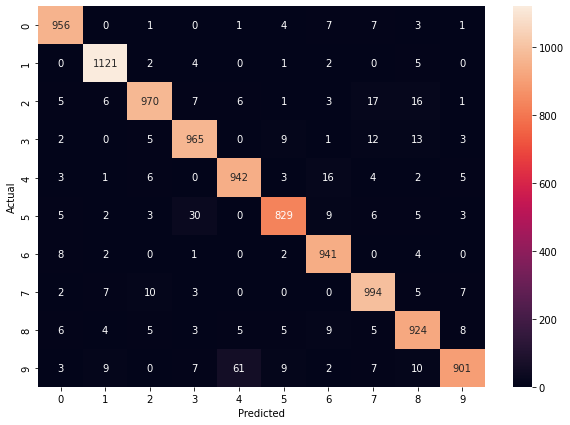

In [25]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [26]:
# to launch tensorboard in jupyter notebook
%load_ext tensorboard
%tensorboard --logdir logs/fit